<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-100-HOT-songs-DB" data-toc-modified-id="1.-100-HOT-songs-DB-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 100 HOT songs DB</a></span><ul class="toc-item"><li><span><a href="#1.1.-Get-the-Song's-name" data-toc-modified-id="1.1.-Get-the-Song's-name-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1. Get the Song's name</a></span></li><li><span><a href="#1.2.-Get-the-Artist-name" data-toc-modified-id="1.2.-Get-the-Artist-name-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2. Get the Artist name</a></span></li><li><span><a href="#1.3.-Built-the-data-frame-with-the-information-scrapped" data-toc-modified-id="1.3.-Built-the-data-frame-with-the-information-scrapped-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3. Built the data frame with the information scrapped</a></span></li><li><span><a href="#1.4.-Integrate-all-the-code-from--scrapping-to-create-the-songs-data-base-in-a-function" data-toc-modified-id="1.4.-Integrate-all-the-code-from--scrapping-to-create-the-songs-data-base-in-a-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4. Integrate all the code from  scrapping to create the songs data base in a function</a></span></li><li><span><a href="#1.4.-Built-user-interaction" data-toc-modified-id="1.4.-Built-user-interaction-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>1.4. Built user interaction</a></span></li></ul></li><li><span><a href="#2.-Implementation-to-our-database-the-audiofeatures" data-toc-modified-id="2.-Implementation-to-our-database-the-audiofeatures-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Implementation to our database the audiofeatures</a></span><ul class="toc-item"><li><span><a href="#2.1.-Handeling-Spotify-API" data-toc-modified-id="2.1.-Handeling-Spotify-API-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1. Handeling Spotify API</a></span></li><li><span><a href="#2.2.-Create-a-function-to-retrieve-the-audiofeatures-for-a-song" data-toc-modified-id="2.2.-Create-a-function-to-retrieve-the-audiofeatures-for-a-song-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2. Create a function to retrieve the audiofeatures for a song</a></span></li><li><span><a href="#2.3.-Create-a-function-to-update-the-hot-songs-data-base" data-toc-modified-id="2.3.-Create-a-function-to-update-the-hot-songs-data-base-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3. Create a function to update the hot songs data base</a></span></li></ul></li></ul></div>

# Project Week 3 - Desired music recommender

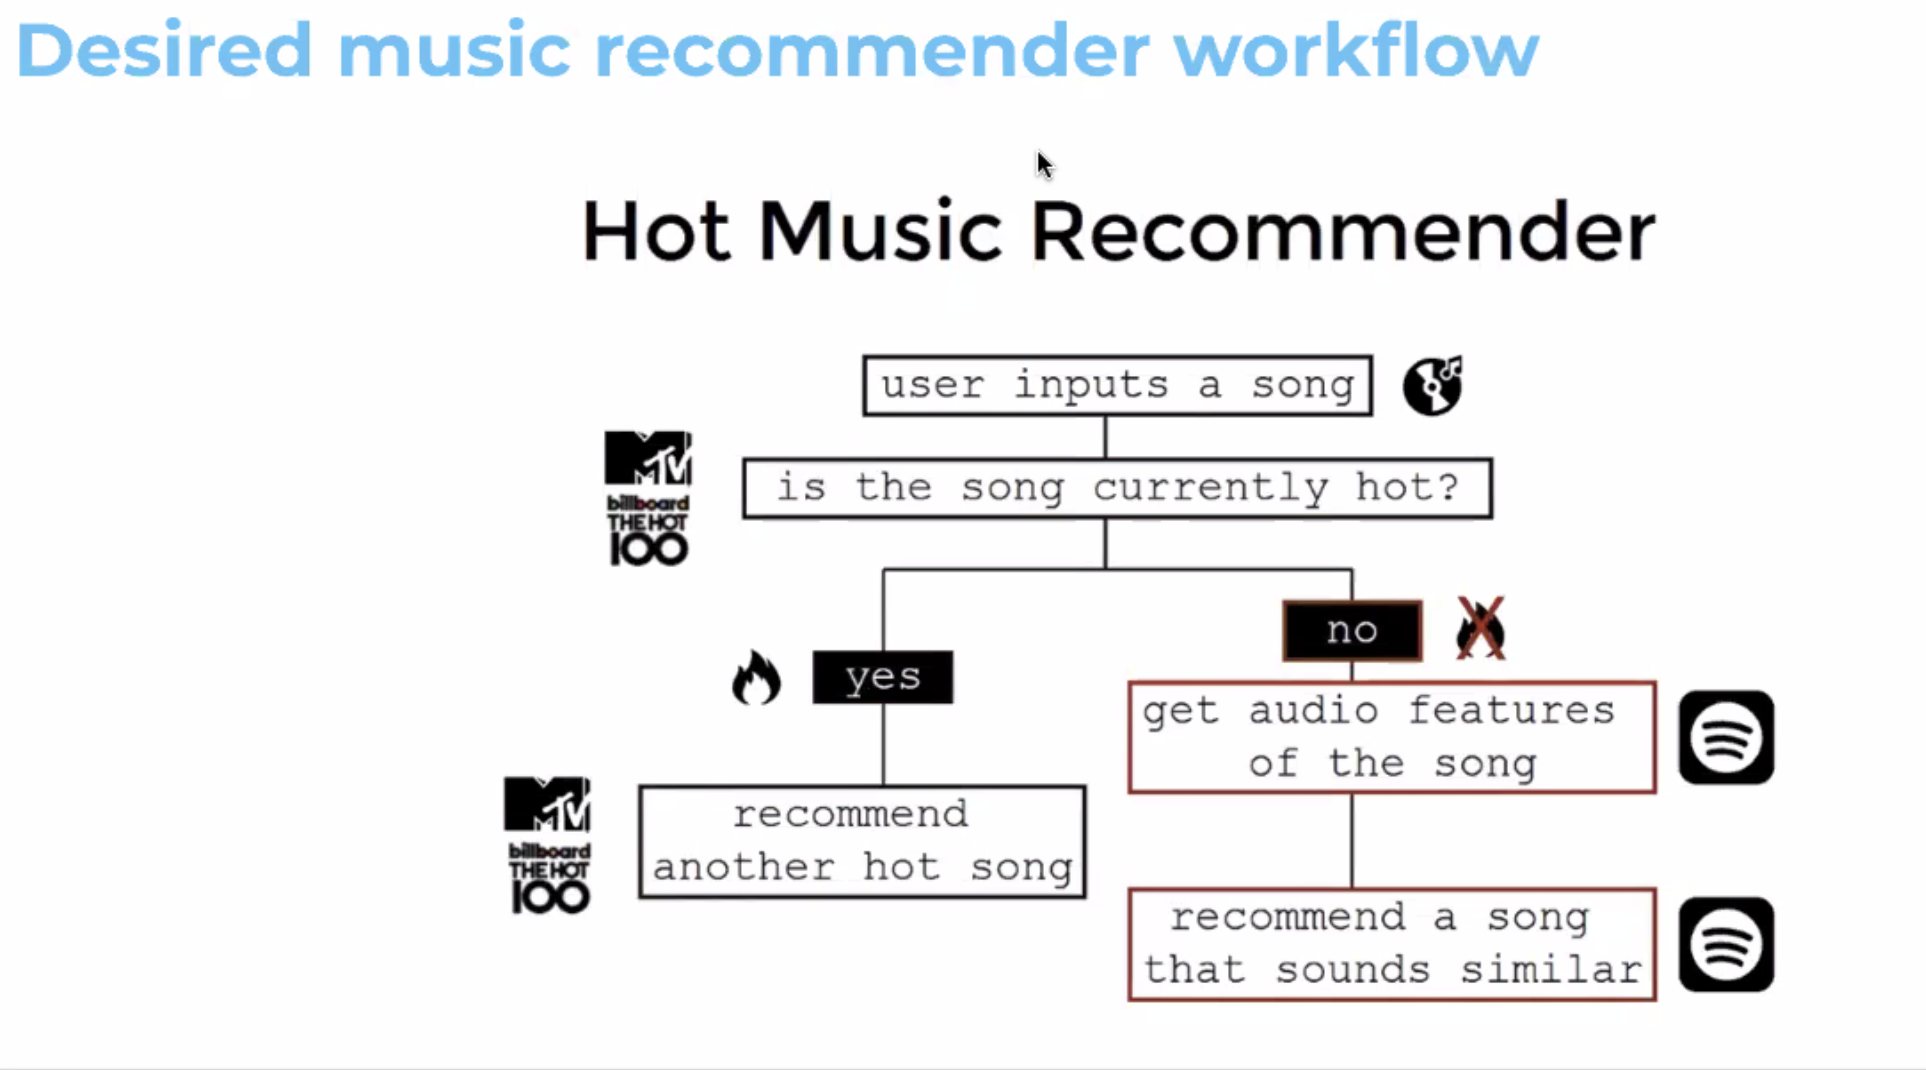

## 1. 100 HOT songs DB

Today's objective is to create a function to scrape the [Billaboards 100 HOT songs](https://www.billboard.com/charts/hot-100) and create a local dataframe of songs with them inluding:

- Song's name
- Song's artist

It is important to get artist because maybe there are song with similar name.

In [11]:
# 1. import libraries
import requests # to download html code
from bs4 import BeautifulSoup # to navigate through the html code
import pandas as pd
import numpy as np
import re

In [12]:
# 2. find url and store it in a variable
url = "https://www.billboard.com/charts/hot-100"

In [13]:
# 3. download html with a get request. Use the function request.get() and store the output in response
response = requests.get(url)
# 200 status code means OK! response.status_code
print(response.status_code)

200


In [14]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.text, 'html.parser')
# 4.2. check that the html code looks like it should
#print(soup.prettify())#it is too much, so I will skip this

### 1.1. Get the Song's name

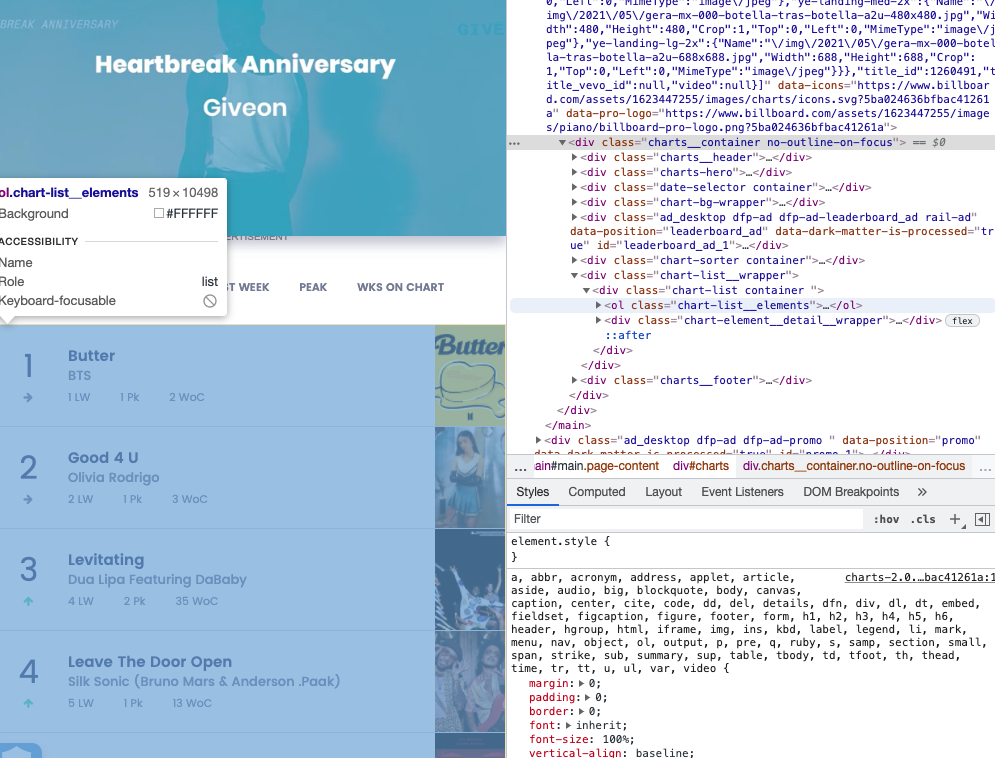

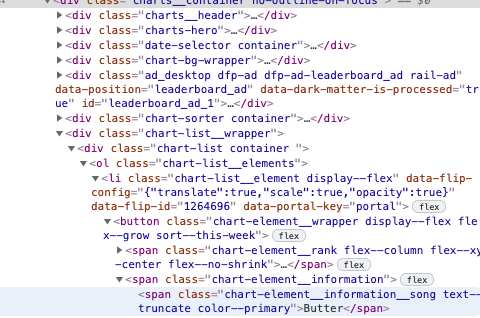

In [15]:
info_songs=soup.select("span.chart-element__information span")
info_songs
#this is not what we want, we have other info
#We are looking for:

#1. Title song: <span class="chart-element__information__song text--truncate 
#color--primary">Butter</span>
#2. Group song<span class="chart-element__information__artist 
#text--truncate color--secondary">BTS</span>
#then i have it for later

[<span class="chart-element__information__song text--truncate color--primary">Butter</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">BTS</span>,
 <span class="chart-element__information__delta color--secondary">
 <span class="chart-element__information__delta__text text--default">-</span>
 <span class="chart-element__information__delta__text text--last">1 Last Week</span>
 <span class="chart-element__information__delta__text text--peak">1 Peak Rank</span>
 <span class="chart-element__information__delta__text text--week">3 Weeks on Chart</span>
 </span>,
 <span class="chart-element__information__delta__text text--default">-</span>,
 <span class="chart-element__information__delta__text text--last">1 Last Week</span>,
 <span class="chart-element__information__delta__text text--peak">1 Peak Rank</span>,
 <span class="chart-element__information__delta__text text--week">3 Weeks on Chart</span>,
 <span class="chart-element__information__song text--tru

In [16]:
titles_songs=soup.find_all("span", {"class":"chart-element__information__song text--truncate color--primary"})
titles_songs

[<span class="chart-element__information__song text--truncate color--primary">Butter</span>,
 <span class="chart-element__information__song text--truncate color--primary">Good 4 U</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__information__song text--truncate color--primary">Peaches</span>,
 <span class="chart-element__information__song text--truncate color--primary">Leave The Door Open</span>,
 <span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Kiss Me More</span>,
 <span class="chart-element__information__song text--truncate color--primary">Astronaut In The Ocean</span>,
 <span class="chart-element__information__song text--truncate color--primary">Deja Vu</span>,
 <span class="chart-element__information__song text--truncate color--primary">Yonaguni</span>,
 <span class="ch

In [17]:
songs=[elem.get_text() for elem in titles_songs]
songs

['Butter',
 'Good 4 U',
 'Levitating',
 'Peaches',
 'Leave The Door Open',
 'Save Your Tears',
 'Kiss Me More',
 'Astronaut In The Ocean',
 'Deja Vu',
 'Yonaguni',
 'Montero (Call Me By Your Name)',
 'Without You',
 'Forever After All',
 'Rapstar',
 'Blinding Lights',
 'Hats Off',
 'Drivers License',
 'Beautiful Mistakes',
 'Traitor',
 'Late At Night',
 'Voice Of The Heroes',
 'Best Friend',
 'Heartbreak Anniversary',
 'Heat Waves',
 'Calling My Phone',
 'Favorite Crime',
 'Lost Cause',
 'Happier',
 'Up',
 'Mood',
 '2040',
 'Every Chance I Get',
 'Telepatia',
 'How It Feels',
 'Brutal',
 'Wockesha',
 'Wants And Needs',
 'Famous Friends',
 'pov',
 'Gone',
 'Beat Box',
 "My Ex's Best Friend",
 'Still Runnin',
 'Track Star',
 'What You Know Bout Love',
 'Who I Want',
 'my.life',
 'Back In Blood',
 'Time Today',
 'Lil Bit',
 'Blame It On You',
 'Nobody',
 'Todo de Ti',
 'Enough For You',
 'Settling Down',
 'Still Hood',
 'Jealousy, Jealousy',
 'Okay',
 'Almost Maybes',
 'Man Of My Word',
 

### 1.2. Get the Artist name

In [18]:
# Group song<span class="chart-element__information__artist 
#text--truncate color--secondary">BTS</span>

artists_names=soup.find_all("span", {"class":"chart-element__information__artist"})
#text--truncate color--secondary"})
artists_names

[<span class="chart-element__information__artist text--truncate color--secondary">BTS</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Olivia Rodrigo</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Dua Lipa Featuring DaBaby</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Justin Bieber Featuring Daniel Caesar &amp; Giveon</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Silk Sonic (Bruno Mars &amp; Anderson .Paak)</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">The Weeknd &amp; Ariana Grande</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Doja Cat Featuring SZA</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Masked Wolf</span>,
 <span class="chart-element__information__artist text--truncate color--se

In [19]:
artists =[elem.get_text() for elem in artists_names]
artists
#we see that for a song sometimes we have more than one artist
#we will need to clean this list in arttis 1, artist 2

['BTS',
 'Olivia Rodrigo',
 'Dua Lipa Featuring DaBaby',
 'Justin Bieber Featuring Daniel Caesar & Giveon',
 'Silk Sonic (Bruno Mars & Anderson .Paak)',
 'The Weeknd & Ariana Grande',
 'Doja Cat Featuring SZA',
 'Masked Wolf',
 'Olivia Rodrigo',
 'Bad Bunny',
 'Lil Nas X',
 'The Kid LAROI',
 'Luke Combs',
 'Polo G',
 'The Weeknd',
 'Lil Baby, Lil Durk & Travis Scott',
 'Olivia Rodrigo',
 'Maroon 5 Featuring Megan Thee Stallion',
 'Olivia Rodrigo',
 'Roddy Ricch',
 'Lil Baby & Lil Durk',
 'Saweetie Featuring Doja Cat',
 'Giveon',
 'Glass Animals',
 'Lil Tjay Featuring 6LACK',
 'Olivia Rodrigo',
 'Billie Eilish',
 'Olivia Rodrigo',
 'Cardi B',
 '24kGoldn Featuring iann dior',
 'Lil Baby & Lil Durk',
 'DJ Khaled Featuring Lil Baby & Lil Durk',
 'Kali Uchis',
 'Lil Baby & Lil Durk',
 'Olivia Rodrigo',
 'Moneybagg Yo',
 'Drake Featuring Lil Baby',
 'Chris Young + Kane Brown',
 'Ariana Grande',
 'Dierks Bentley',
 'SpotemGottem Featuring Pooh Shiesty Or DaBaby',
 'Machine Gun Kelly X blackbe

### 1.3. Built the data frame with the information scrapped

We will create a dictionary where the keys are the features and the values the list with all this features.

In [20]:
dic_songs= {"Title":songs, "Artist":artists}

We can create a dataframe with this dictionary.

In [21]:
hot_songs= pd.DataFrame(dic_songs)
hot_songs

,Title,Artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Levitating,Dua Lipa Featuring DaBaby
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...
95,Things A Man Oughta Know,Lainey Wilson
96,Country Again,Thomas Rhett
97,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert
98,If You Want To,Lil Baby & Lil Durk


In [22]:
hot_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   100 non-null    object
 1   Artist  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


We can transform the Artist column into other columns containing just one artist or leave it like this and have it in mind when we create the user interaction.

### 1.4. Integrate all the code from  scrapping to create the songs data base in a function

In [23]:
def scrapp_hotsongs():
    url = "https://www.billboard.com/charts/hot-100"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    titles_songs = soup.find_all("span", {"class": "chart-element__information__song text--truncate color--primary"})
    songs = [elem.get_text() for elem in titles_songs]
    artists_names = soup.find_all("span", {"class": "chart-element__information__artist"})
    artists = [elem.get_text() for elem in artists_names]
    return songs, artists

def obtain_hotsong_db(list_of_list):
    songs,artists = list_of_list
    dic_songs = {"Title": songs, "Artist": artists}
    hot_songs = pd.DataFrame(dic_songs)
    return hot_songs


### 1.4. Built user interaction

In [24]:
#Ask the user to input a song and artist
#Check for possible errors while entering the input
#What happens when there several songs with the same name?
#Then we will have to ask for the artist
#Check if this is contain in our dataframe
#If it appears, we will return a randoom choice from our data
#set
#If not...tomorrow

In [25]:
#function tha get the input
#function to check if the input is in the dataframe
    ##function that picks randomly a song from the df
    ##function that does I don't know what in Spotify (tomorow)

In [26]:
def user_input():
    '''
    This function asks the user for a song.
    Takes an input form the user and it asks again if the input was the correct.
    In the case the user makes a mistake typing,the choice can be changed.
    '''
    while True:
        user_song = input("Please, enter a song that you like or a part of the title of the song:")
        print("Is this what you want to enter in the recommender? ",user_song)
        correct_song = input("Enter Y/N:")
        if correct_song == "Y":
            print("Perfect, let's continue!")
            break
        if correct_song == "N":
            continue
        else:
            continue
    return user_song

In [27]:
# "Butter"==hot_songs["Title"]

In [28]:
#hot_songs["Title"].str.lower().str.capitalize()
#user_song in hot_songs["Title"]
#this does not work for the data frame
#hot_songs["Title"].str.contains("bu",flags=re.IGNORECASE)#ignores upper/low case
#hot_songs[hot_songs["Title"].str.contains("bu",flags=re.IGNORECASE)]

In [29]:
# possible_songs=hot_songs[hot_songs["Title"].str.contains("bu",flags=re.IGNORECASE)]["Title"].tolist()
# print("Is any of those songs?")
# dic_possible_song={} #dictionary of possible songs
# for n,possible_song in enumerate(possible_songs): #can i cnahe the 0 for 1
#     print(n,possible_song)
#     dic_possible_song[n]=possible_song
# while True:
#     try:
#         possible_song_input = input("Please enter the number corresponding to the song: ")
#         song = dic_possible_song[int(possible_song_input)]
#         print("Your song is: {}".format(song))
#         break
#     except: 
#         print("Enter the right number")

    
#     for i in range(1,len(possible_songs)+1):
#         print("{}. {}".format(i,possible_song))
#     song_2 = input("Enter the number of your option:") #try for errors
    
    
# for n, fruit in enumerate(fruits):
# ...     print(n, fruit)

In [37]:
def check_song(song):  # Do I have to put the function as argument?
    '''
    This function checks if the input typed by the users is contained in the titles of the song.
    If you enter just a part of the title it will return all possible options found on the database
    Hotsongs.
    The user will have to choose one of the options presented.
    Finally the user will we recommended a song with the function return_hot_song()
    '''
    #     if song==hot_songs["Title"].any():
    #         print("We found your song: {}".format(song))
    #         return_hot_song()
    if hot_songs["Title"].str.contains(song, flags=re.IGNORECASE).any():
        possible_songs = hot_songs[hot_songs["Title"].str.contains(song, flags=re.IGNORECASE)]["Title"].tolist()
        print("Is any of those songs?")
        dic_possible_song = {}  # dictionary of possible songs
        for n, possible_song in enumerate(possible_songs):  # can i cnahe the 0 for 1
            print(n + 1, possible_song)
            dic_possible_song[n+1] = possible_song
        while True:
            possible_song_input = input("Please enter the number corresponding to the song: ")
            try:
                song = dic_possible_song[int(possible_song_input)]
                artist = hot_songs.loc[hot_songs["Title"] == song, "Artist"].reset_index().iloc[0, 1]
                print("Is your song from this artist? {}".format(artist))
                check_artist = input("Enter Y/N:")
                if check_artist == "Y":  # It jumps to the questions again instead of accessing the function
                    print("Great!")
                    return return_hot_song()
                if check_artist == "N":
                    print("We will have to redirect you to Spotify, we don't have this song in the DB")
                    #ask for the artist
                    break
                else:
                    print("Try again from the beginning!")
                    break
            except:
                print("Enter the right number!")

In [31]:
# hot_songs["Title"].str.contains(song,flags=re.IGNORECASE).any()

In [32]:
# string_song = hot_songs["Title"].sample().to_string()
# song_recommended = re.findall(r"\w[a-z,A-Z].+",string_song)
# print("We recommend you this song: {}".format(song_recommended))
# re.findall(r"\w[a-z,A-Z]+",'84    Arcade')

In [33]:
def return_hot_song():
    '''
    This functions returns a random song from the Hot Songs data set as a recommendations
    for the user.
    It has no arguments as inputs, it is placed in a previous function that checks weather the song is in
    the HotSong dataset.
    '''
    title_song_recommended = hot_songs["Title"].sample().reset_index().iloc[0,1]
    artist_song_recommend = hot_songs.loc[hot_songs["Title"] == title_song_recommended,"Artist"].reset_index().iloc[0,1]
    print(f"We recommend you the song: {title_song_recommended}, from: {artist_song_recommend}")
    
#Is there another way to do that instead of the reset index? It prints always the row name

In [38]:
hot_songs = obtain_hotsong_db(scrapp_hotsongs())
check_song(user_input())

Please, enter a song that you like or a part of the title of the song:bu
Is this what you want to enter in the recommender?  bu
Enter Y/N:Y
Perfect, let's continue!
Is any of those songs?
1 Butter
2 Build A Bitch
Please enter the number corresponding to the song: 1
Is your song from this artist? BTS
Enter Y/N:Y
Great!
We recommend you the song: Enough For You, from: Olivia Rodrigo


## 2. Implementation to our database the audiofeatures

### 2.1. Handeling Spotify API

Before that we will need to get credentials for our account. Create a python file with the credentials store in the same folder, but remember to include this file on your gitignore to don't share it after on your repo. 

In [9]:
#Access to my file with the Credentials
import sys
sys.path.insert(1, '/Credentials/')
from config import *

In [ ]:
'/Users/lauratll/Documents/Data_Analysis/IronHack/Week_3/DAY2/Credentials/

In [2]:
#Import the requested libraries to work
#The installer: conda install -c conda-forge spotipy

import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [10]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))


In [5]:
results = sp.search(q='Butter', limit=5)

In [7]:
results["tracks"]

{'href': 'https://api.spotify.com/v1/search?query=Butter&type=track&offset=0&limit=5',
 'items': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
      'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
      'id': '3Nrfpe0tUJi4K4DXYWgMUX',
      'name': 'BTS',
      'type': 'artist',
      'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',

### 2.2. Create a function to retrieve the audiofeatures for a song

### 2.3. Create a function to update the hot songs data base